In [5]:
import json

# Load the data
with open('gdpr_pa_bench_mc_results.json') as f:
    data = json.load(f)

# Modify the JSON structure
modified_data = []
for entry in data:
    modified_entry = {
        "id": entry["id"],
        "correct_answer": [answer.strip()[0] for answer in entry["correct_answer"].split("\n") if answer.strip() != ""]
    }
    for model in ["qwen", "llama", "zephyr", "orca", "gpt4"]:
        modified_entry[model] = [answer.strip()[0] for answer in entry[model].split("\n") if answer.strip() != ""]
    modified_data.append(modified_entry)

# Save the modified data
with open('gdpr_pa_bench_mc_results_modified.json', 'w') as f:
    json.dump(modified_data, f, indent=4)

# Display the first two entries for verification
print(json.dumps(modified_data[:2], indent=4))


[
    {
        "id": 1,
        "correct_answer": [
            "a",
            "b",
            "e",
            "g"
        ],
        "qwen": [
            "b",
            "e",
            "g"
        ],
        "llama": [
            "e",
            "g"
        ],
        "zephyr": [
            "e",
            "g"
        ],
        "orca": [
            "b",
            "e",
            "g",
            "h"
        ],
        "gpt4": [
            "a",
            "b",
            "e",
            "g"
        ]
    },
    {
        "id": 2,
        "correct_answer": [
            "a",
            "b",
            "c",
            "f",
            "h"
        ],
        "qwen": [
            "c",
            "e",
            "f",
            "g",
            "h"
        ],
        "llama": [
            "c",
            "h"
        ],
        "zephyr": [
            "c",
            "h"
        ],
        "orca": [
            "c",
            "e",
            "g",
          

        accuracy  f1_score
qwen       0.785  0.784952
llama      0.680  0.676081
zephyr     0.730  0.729757
orca       0.775  0.774994
gpt4       0.775  0.769461


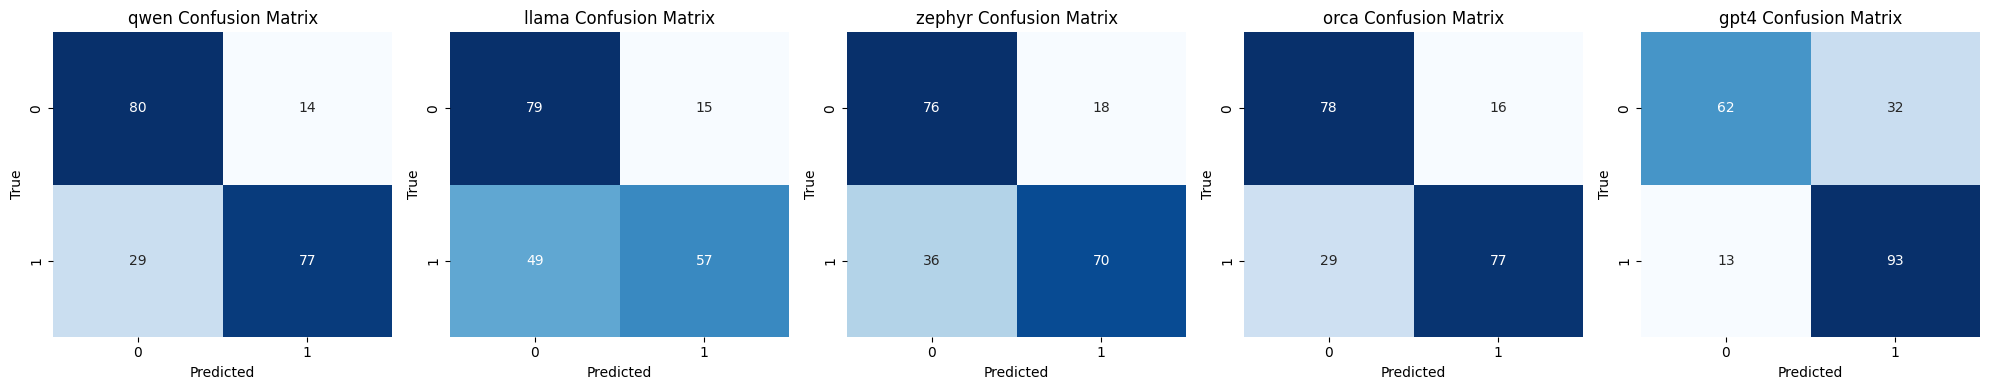

In [13]:
import json
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
with open('gdpr_pa_bench_mc_results_modified.json') as f:
    data = json.load(f)

# Define models and all possible categories
models = ["qwen", "llama", "zephyr", "orca", "gpt4"]
all_categories = set('abcdefgh')

# Prepare the lists for y_true and y_pred for each model
true_labels = {model: [] for model in models}
pred_labels = {model: [] for model in models}

# Process the data
for entry in modified_data:
    correct = set(entry["correct_answer"])
    for model in models:
        predicted = set(entry[model])
        y_true = [1 if cat in correct else 0 for cat in all_categories]
        y_pred = [1 if cat in predicted else 0 for cat in all_categories]
        true_labels[model].extend(y_true)
        pred_labels[model].extend(y_pred)

# Calculate confusion matrices and metrics
confusion_matrices = {}
metrics = {}

for model in models:
    y_true = true_labels[model]
    y_pred = pred_labels[model]
    cm = confusion_matrix(y_true, y_pred)
    confusion_matrices[model] = cm
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')  # Use macro average for multi-class
    metrics[model] = {"accuracy": acc, "f1_score": f1}

# Display metrics
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# Plot confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, model in enumerate(models):
    sns.heatmap(confusion_matrices[model], annot=True, fmt="d", ax=axes[i], cbar=False, cmap="Blues")
    axes[i].set_title(f'{model} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()